In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import random 
from pprint import pprint

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df = df.drop("Id", axis=1)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df = df.rename(columns={"species": "label"})

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
### train test split 

In [11]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = test_size * len(df)
    
    #all indices from data
    indeces = df.index.tolist()
    test_indeces = random.sample(population=indeces, k=test_size)
    
    test_df = df.loc[test_indeces]
    train_df = df.drop(test_indeces)

    return train_df, test_df

In [12]:
random.seed(0)

train_df, test_df = train_test_split(df,test_size = 20)

In [13]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [14]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [15]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [16]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    
    if len(unique_classes) == 1:
        return True 
    else:
        return False

In [17]:
check_purity(train_df[train_df.PetalWidthCm > 0.8].values)

False

In [18]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True)
    
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification 

In [19]:
classify_data(train_df[train_df.PetalWidthCm < 1.2].values)

'Iris-setosa'

In [20]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)
    
    for index in range(len(unique_values)):
        if index != 0:
            current_value = unique_values[index]
            previous_value = unique_values[index -1]
            potential_split = (current_value + previous_value) / 2
            
            potential_splits[column_index].append(potential_split)
    return potential_splits

In [21]:
get_potential_splits(train_df.values)

{0: [],
 1: [],
 2: [],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.75,
  1.85,
  1.95,
  2.05,
  2.1500000000000004,
  2.25,
  2.3499999999999996,
  2.45]}

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
potential_splits = get_potential_splits(train_df.values)

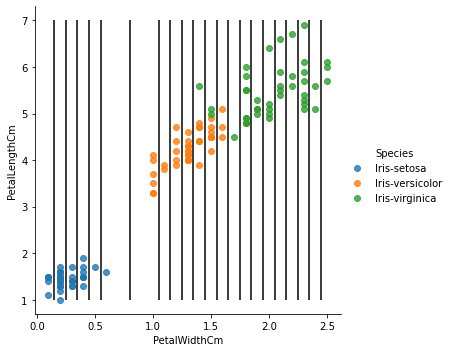

In [38]:
sns.lmplot(data=train_df, x="PetalWidthCm", y="PetalLengthCm", hue="Species",fit_reg=False)

plt.vlines(x=potential_splits[3], ymin=1, ymax=7)

In [39]:
def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]
    
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    
    return data_below, data_above

In [28]:
split_column = 3
split_value = 0.8

In [29]:
data_below, data_above = split_data(data, split_column, split_value)

In [45]:
plotting_df = pd.DataFrame(data, columns=df.columns)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlin'

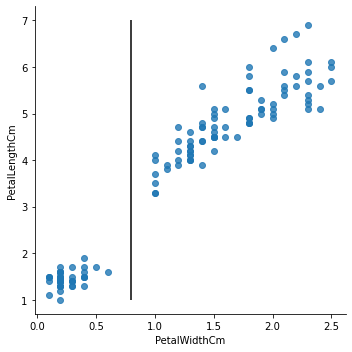

In [46]:
sns.lmplot(data=plotting_df, x="PetalWidthCm", y="PetalLengthCm",fit_reg=False)

plt.vlines(x=split_value, ymin=1, ymax=7)
plt.xlin(0, 2.6)

In [47]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)
    
    probablities = counts/counts.sum()
    entropy = sum(probablities * -np.log2(probablities))
    
    return entropy

In [48]:
calculate_entropy(data_above)

1.0

In [49]:
def calculate_overall_entropy(data):
    
    n_data_points = len(data_below) + len(data_above)
    
    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    
    overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [50]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)
            
            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
                
        return best_split_column, best_split_value

In [51]:
potential_splits = get_potential_splits(data)

In [55]:
determine_best_split(data, potential_split)